In [1]:
import numpy as np
from pso import *
from soga import *
from lshade import *
from data import *
from evaluate import *
from util import *
import matplotlib.pyplot as plt
import tqdm
import pickle

# Testing

In [55]:
# import pickle
# file = open('test.pkl', 'rb')
# network = pickle.load(file)
# file.close()

In [56]:
# N_SENSORS = 200
# N_TARGETS = 200
# network = create_example_data(N_SENSORS, N_TARGETS, area=((0, 400), (0, 400)))
# # network.sensors.shape
# show_network(network, figsize=(30, 30))

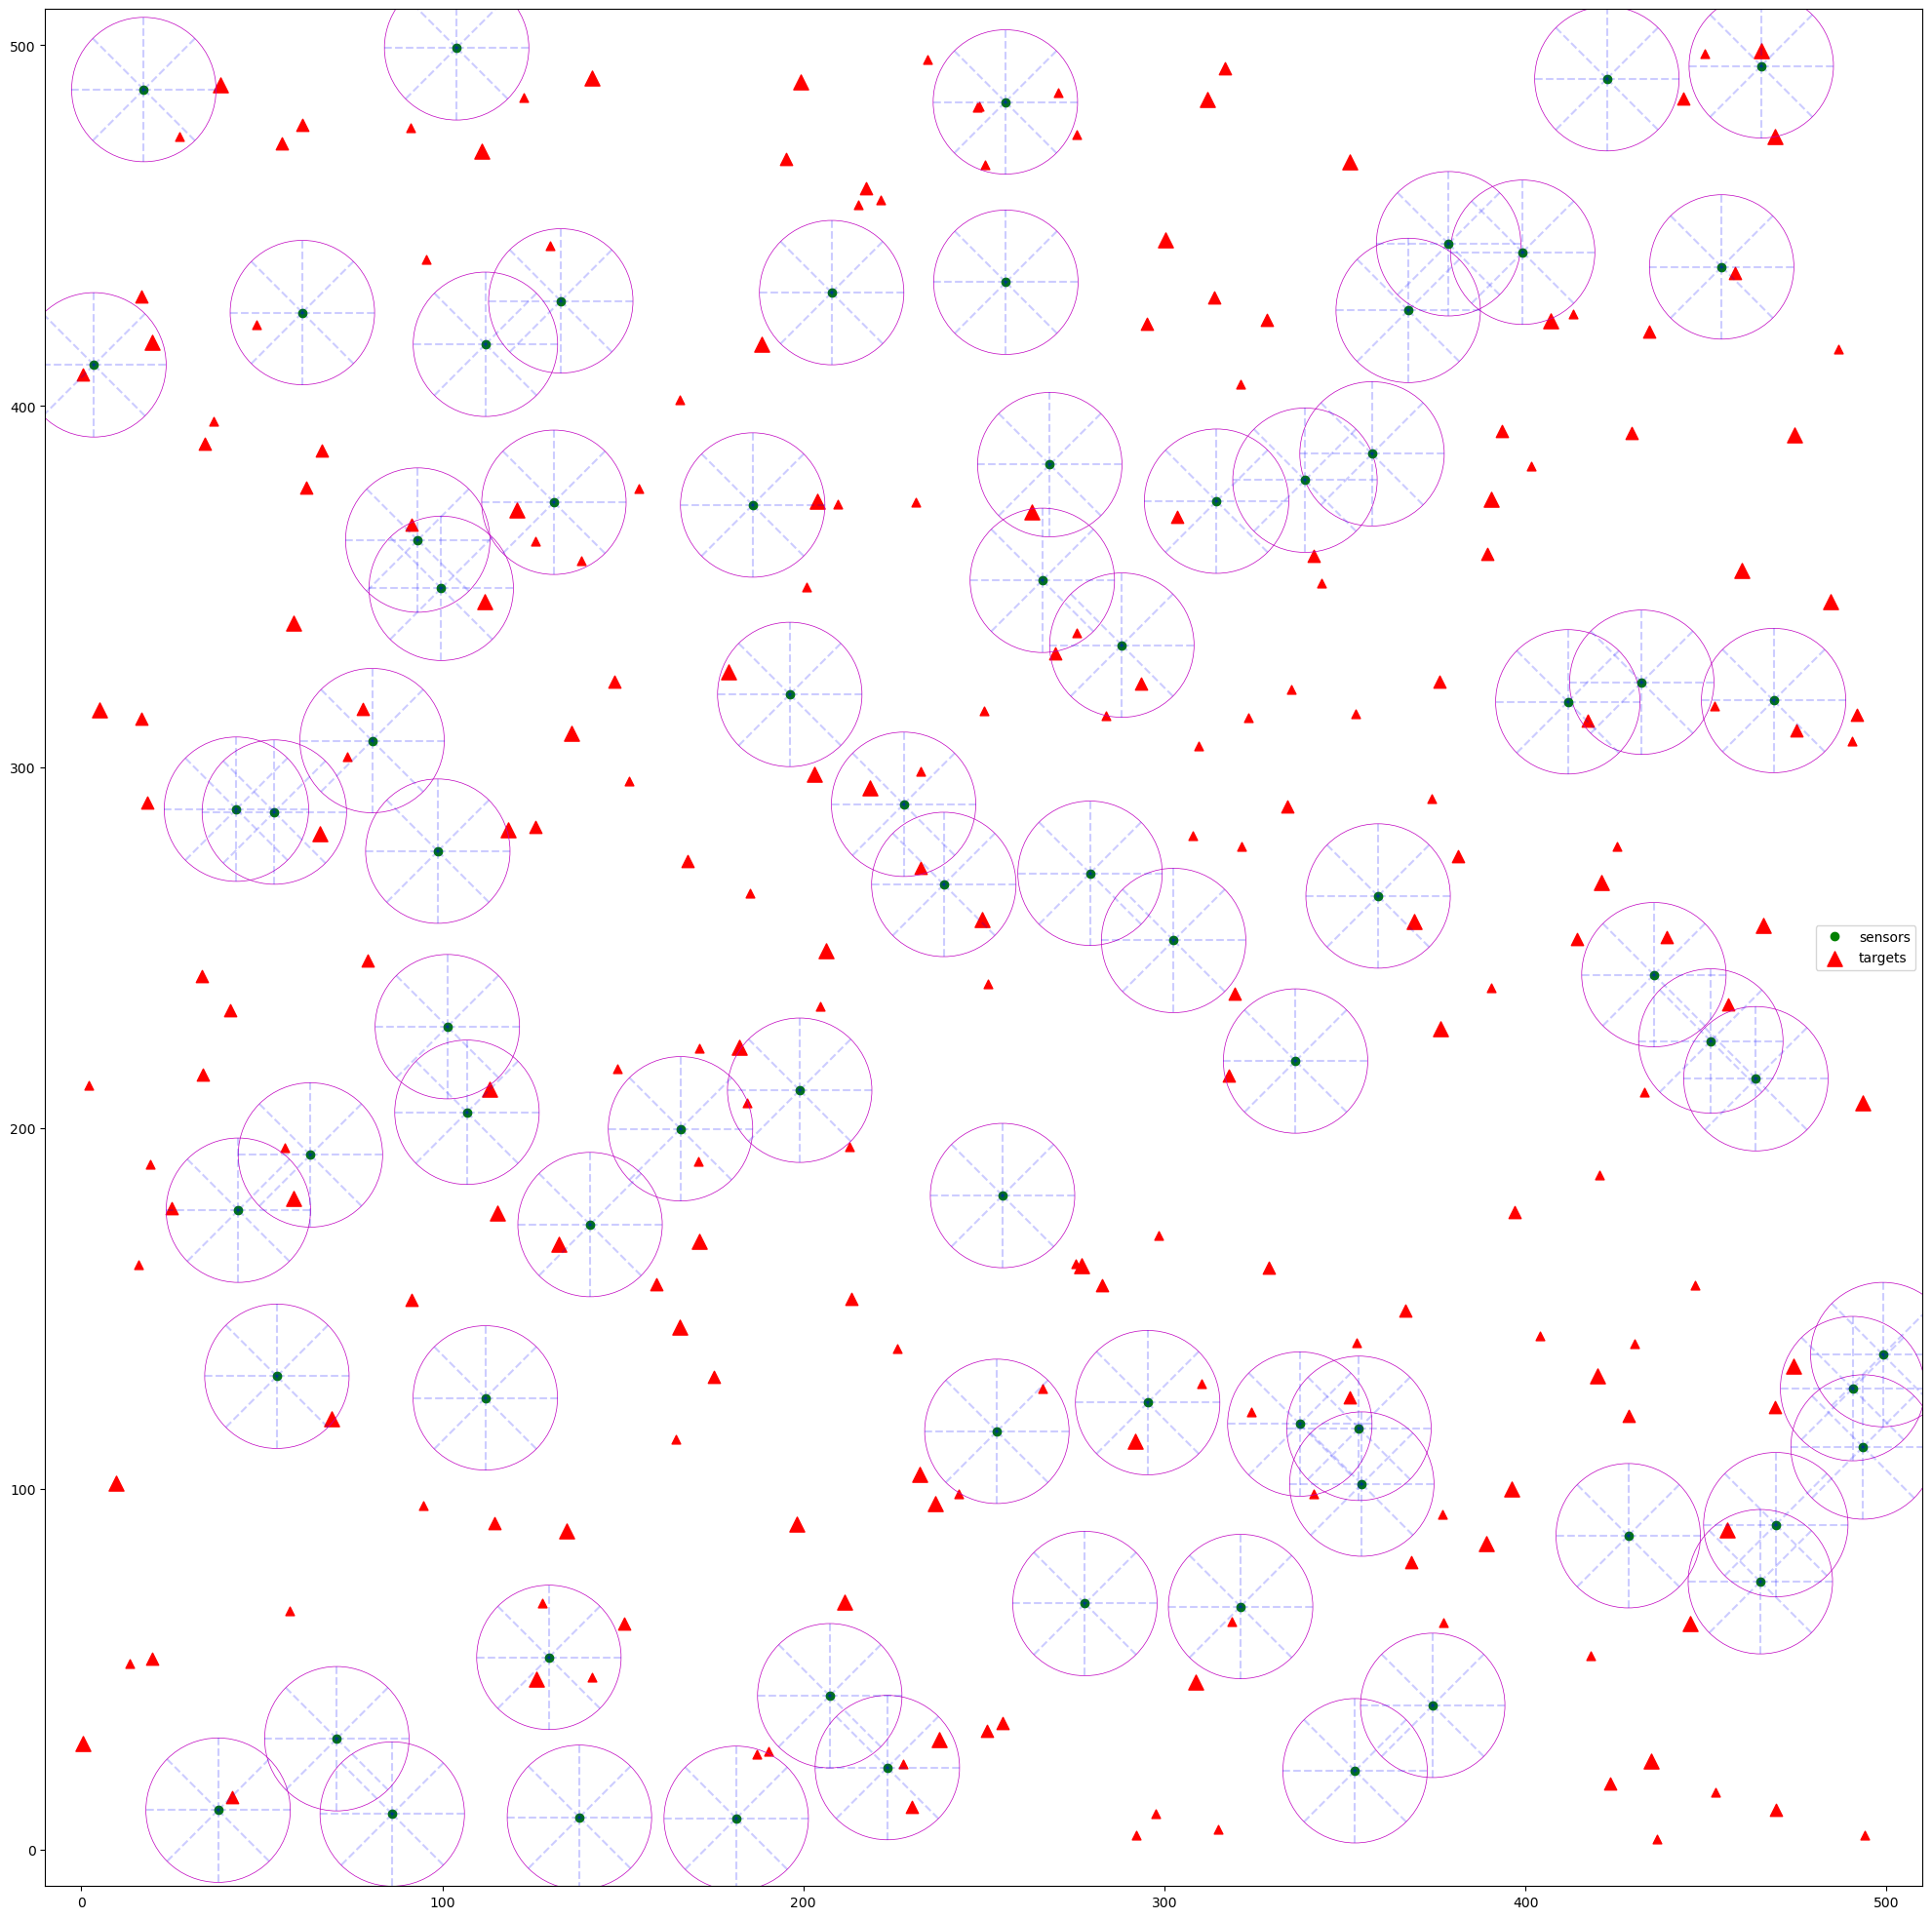

In [18]:
N_SENSORS = 30
N_TARGETS = 50
# network = create_example_smooth_data(120, 45, area=((0, 500), (0, 500)), n_sub_areas=10)
network = datasets['fixed-sensor'][0]['huge'][21]
show_network(network, figsize=(25, 25))

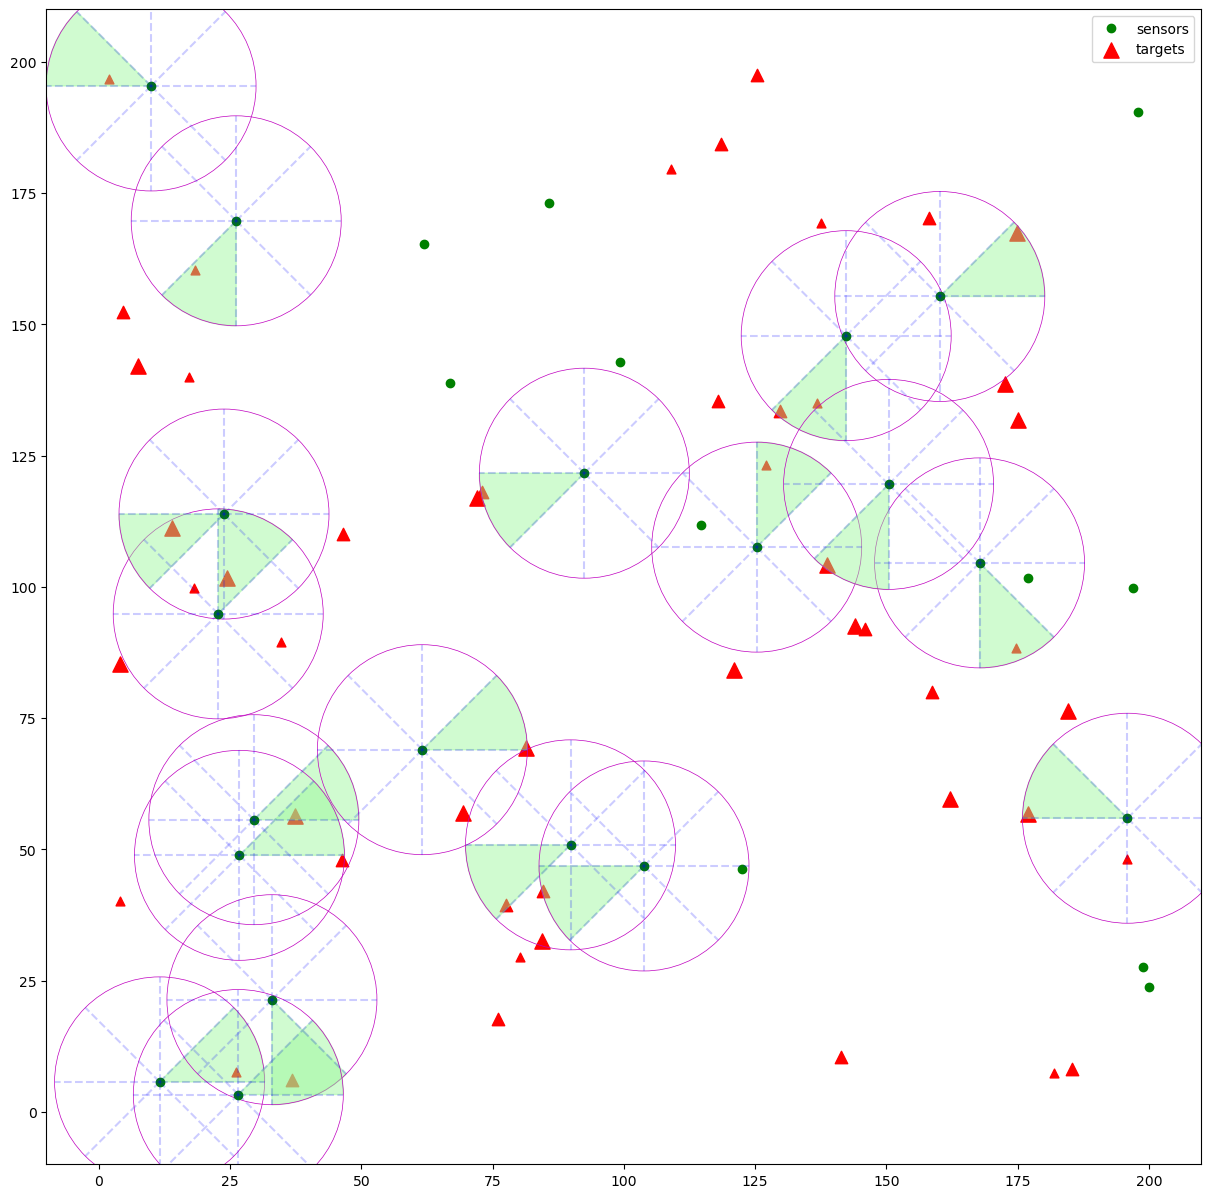

In [4]:
solver = SOGA()
solver.adapt(network)
C, a = solver.solve(mode='priotirize')
C[C == None] = solver.q
show_network(network, sensors_mask=C, figsize=(15, 15))

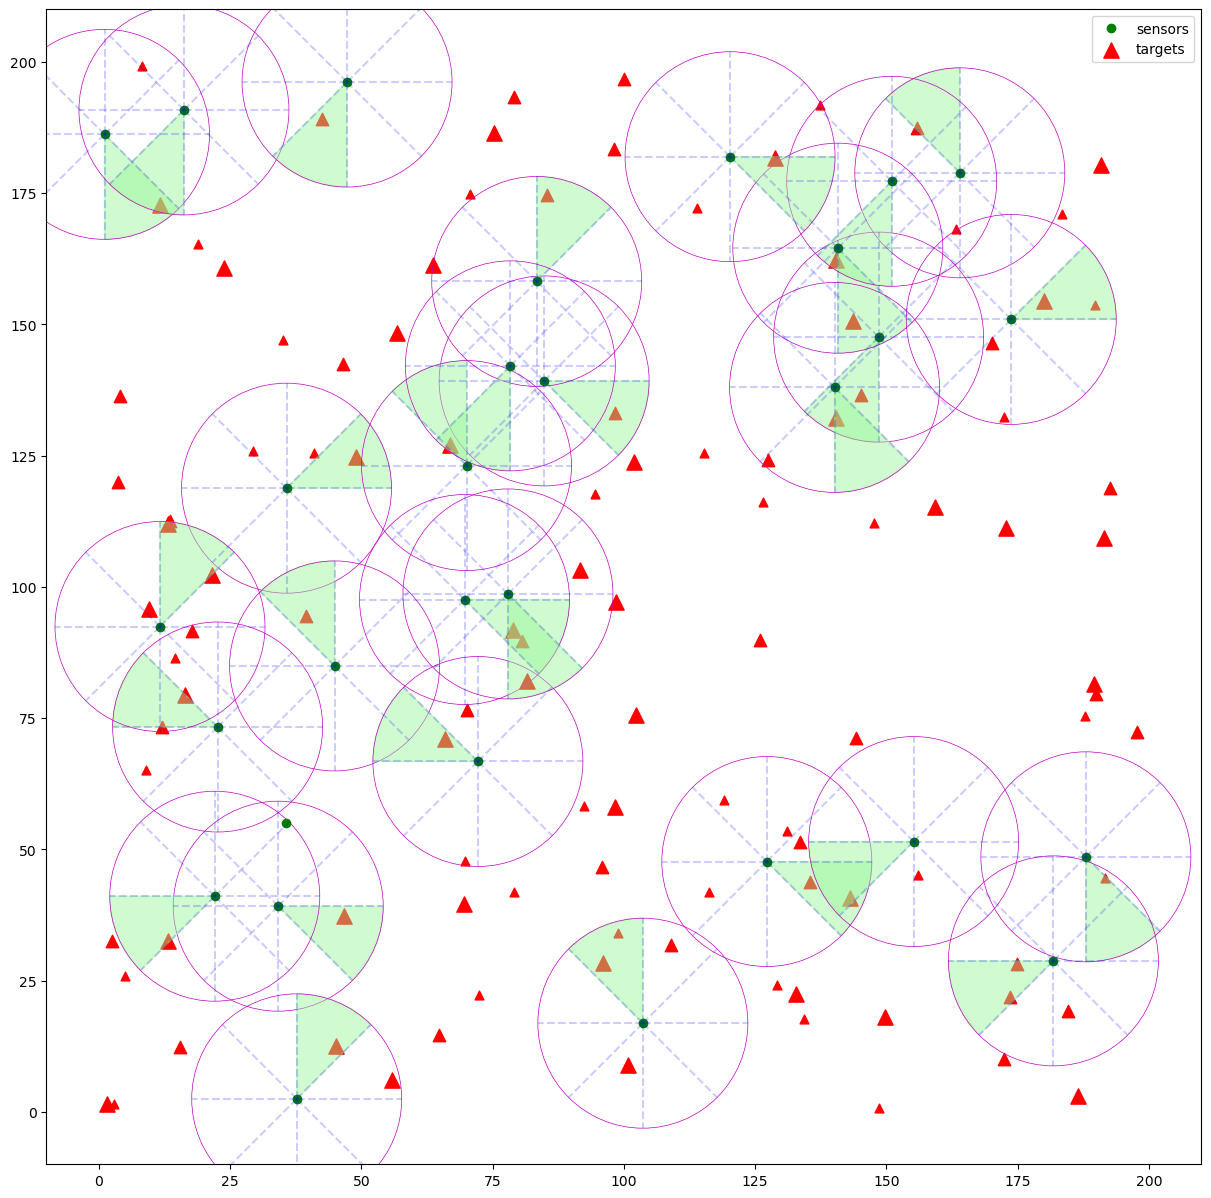

In [108]:
lshade = LSHADE()
lshade.adapt(network)
bound_values = np.repeat([[-0.5, 8.5]], 30, axis=0)
config = LSHADEConfig(
    population_size=30*18,
    memory_size=15,
    max_evals=2000*30,
    bounds=bound_values,
    seed=29,
    useless_penalty=6,
    activated_penalty=0.001)
best, best_val, hist = lshade.solve(config)
show_network(network, sensors_mask=np.round(best).astype(int), figsize=(15, 15))

In [109]:
sensors_mask = np.round(best).astype(int)
a_shade = achieved_coverage(sensors_mask, network.m, network.q, lshade.T)

In [125]:
distance_index(network.K, a)

0.26802218114602583

# Dataset

In [2]:
# datasets = create_multi_datasets()
# with open('./saved/dataset.pkl', 'wb') as f:
#     datasets = pickle.dump(datasets, f)
with open('./saved/dataset.pkl', 'rb') as f:
    datasets = pickle.load(f)

In [3]:
DATA_TYPES = ['fixed-sensor', 'fixed-target']
DATA_SIZES = ['small', 'large', 'huge']

# Solve

## LSHADE

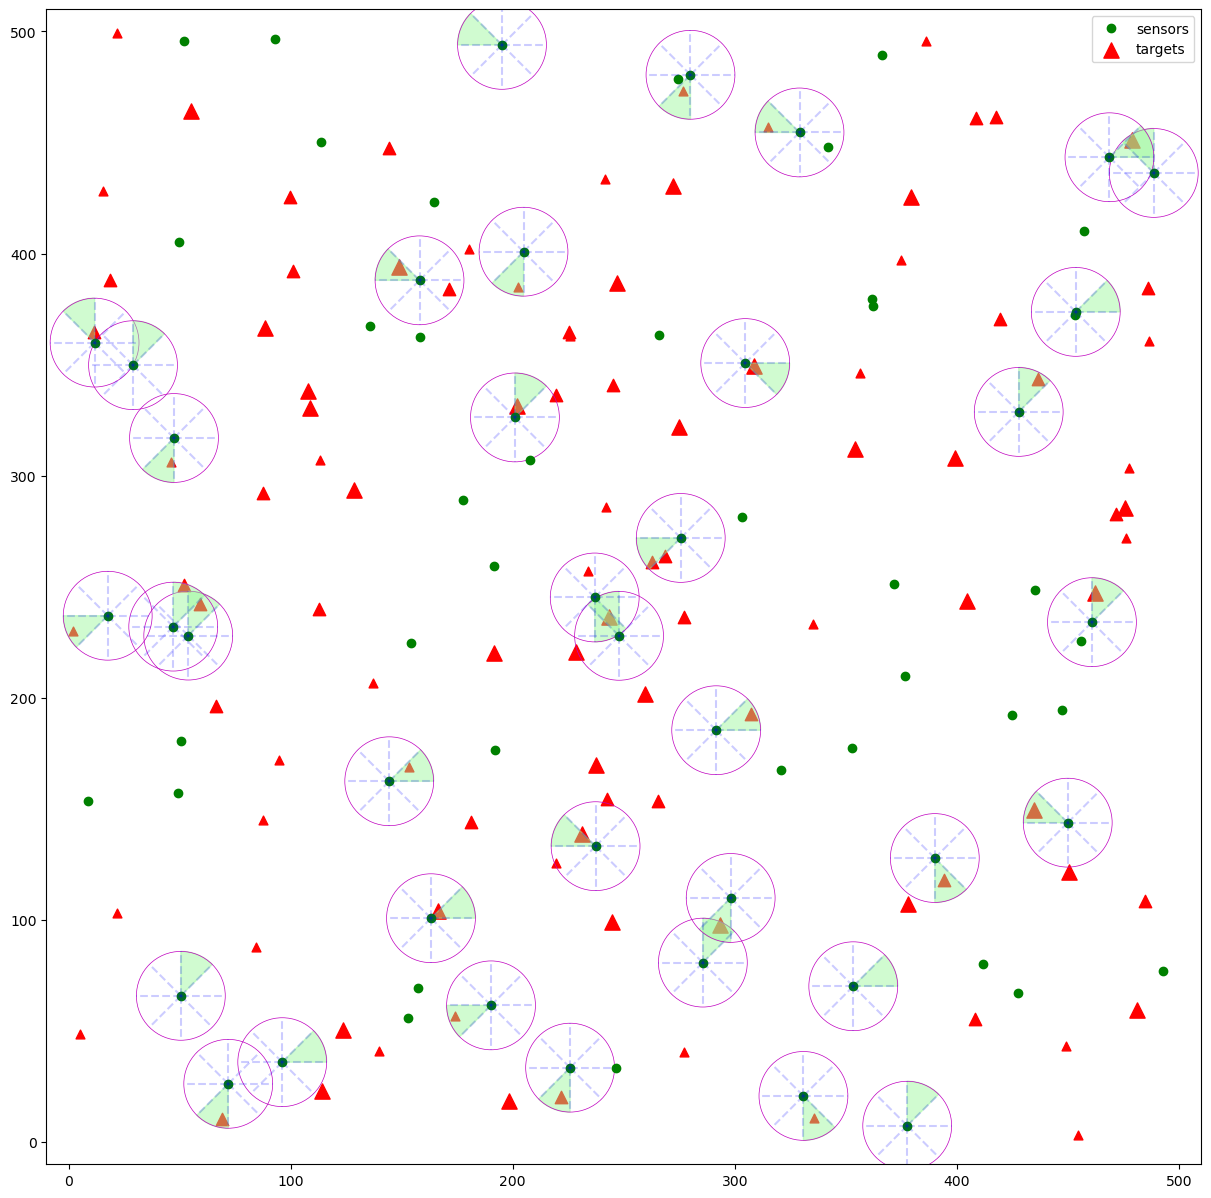

In [134]:
dt = datasets['fixed-sensor'][2]['huge'][9]
lshade = LSHADE()
lshade.adapt(dt)
bound_values = np.repeat([[-0.5, 8.5]], dt.n, axis=0)
config = LSHADEConfig(
    population_size=dt.n*25,
    memory_size=15,
    max_evals=2000*dt.n,
    bounds=bound_values,
    seed=29,
    useless_penalty=10,
    activated_penalty=0.001)
best, best_val, hist = lshade.solve(config)
sensors_mask = np.round(best).astype(int)
show_network(data=dt, sensors_mask=sensors_mask, figsize=(15, 15))

In [160]:
data_type = 'fixed-sensor'
for i in tqdm.tqdm(range(len(datasets[data_type]))):
    dataset_res = {}
    for data_size in datasets[data_type][i]:
        dataset_size_res = []
        for j in range(len(datasets[data_type][i][data_size])):
            dt = datasets[data_type][i][data_size][j]
            lshade = LSHADE()
            lshade.adapt(dt)
            bound_values = np.repeat([[-0.5, 8.5]], dt.n, axis=0)
            config = LSHADEConfig(
                population_size=dt.n*20,
                memory_size=15,
                max_evals=2000*dt.n,
                bounds=bound_values,
                seed=29,
                useless_penalty=3,
                activated_penalty=0.001)
            best, best_val, hist = lshade.solve(config)
            sensors_mask = np.round(best).astype(int)
            res = SolveResult(sensors_mask=sensors_mask)

            dataset_size_res.append(res)
        dataset_res[data_size] = dataset_size_res
    lshade_res_fixed_sensor_3.append(dataset_res)

100%|██████████| 10/10 [6:08:55<00:00, 2213.52s/it] 


In [161]:
with open('./saved/lshade_res_fixed_sensor_3.pkl', 'wb') as f:
    pickle.dump(lshade_res_fixed_sensor_3, f)

In [162]:
lshade_res_fixed_sensor_1 = []
data_type = 'fixed-sensor'
for i in tqdm.tqdm(range(len(datasets[data_type]))):
    dataset_res = {}
    for data_size in datasets[data_type][i]:
        dataset_size_res = []
        for j in range(len(datasets[data_type][i][data_size])):
            dt = datasets[data_type][i][data_size][j]
            lshade = LSHADE()
            lshade.adapt(dt)
            bound_values = np.repeat([[-0.5, 8.5]], dt.n, axis=0)
            config = LSHADEConfig(
                population_size=dt.n*20,
                memory_size=15,
                max_evals=2000*dt.n,
                bounds=bound_values,
                seed=29,
                useless_penalty=1,
                activated_penalty=0.001)
            best, best_val, hist = lshade.solve(config)
            sensors_mask = np.round(best).astype(int)
            res = SolveResult(sensors_mask=sensors_mask)

            dataset_size_res.append(res)
        dataset_res[data_size] = dataset_size_res
    lshade_res_fixed_sensor_1.append(dataset_res)

with open('./saved/lshade_res_fixed_sensor_1.pkl', 'wb') as f:
    pickle.dump(lshade_res_fixed_sensor_1, f)

100%|██████████| 10/10 [5:36:12<00:00, 2017.21s/it] 


In [ ]:
# DI_fs_small = []
# VAR_fs_small = []
# CQ_fs_small = []
# AS_fs_small = []
# for i in range(10):
#     di = []
#     var = []
#     cq = []
#     active_sensor = []
#     for dt in tqdm.tqdm(dataset['fixed-sensor'][i]['small']):
#         # dt = Data(n=dt['n'], m=dt['m'], q=dt['q'], radius=dt['radius'], K=dt['K'], sensors=dt['sensors'], targets=dt['targets'], area=dt['margin'])
#         lshade_small_fs.adapt(dt)
#         bound_values = np.repeat([[-0.5, 8.5]], dt.n, axis=0)
#         config = LSHADEConfig(
#             population_size=dt.n*18,
#             memory_size=15,
#             max_evals=2000*dt.n,
#             bounds=bound_values,
#             seed=29,
#             useless_penalty=6,
#             activated_penalty=0.001)
#         best, best_val, hist = lshade_small_fs.solve(config)
#         sensors_mask = np.round(best).astype(int)
#         a = achieved_coverage(sensors_mask, dt.m, dt.q, lshade_small_fs.T, dt.K)

#         DI_score = distance_index(np.asarray(dt.K), a)
#         print(DI_score)
#         var_score = variance(np.asarray(dt.K), a)
#         cq_score = coverage_quality(data=dt, sensors_mask=sensors_mask)
#         activated_sensor_score = activated_sensor(sensors_mask=sensors_mask)

#         di.append(DI_score)
#         var.append(var_score)
#         cq.append(cq_score)
#         active_sensor.append(activated_sensor_score)
#     DI_fs_small.append(di)
#     VAR_fs_small.append(var)
#     CQ_fs_small.append(cq)
#     AS_fs_small.append(active_sensor)

## SOGA

### linear mode

In [6]:
soga_linear_res = {'fixed-sensor': [], 'fixed-target': []}
soga = SOGA()

In [7]:
for data_type in DATA_TYPES:
    data_type_res = []
    for i in tqdm.tqdm(range(len(datasets[data_type]))):
        dataset_res = {}
        for data_size in datasets[data_type][i]:
            dataset_size_res = []
            for j in range(len(datasets[data_type][i][data_size])):
                dt = datasets[data_type][i][data_size][j]
                soga.adapt(data=dt)
                sensors_mask, _ = soga.solve(mode='linear')
                res = SolveResult(sensors_mask=sensors_mask)
                
                dataset_size_res.append(res)
            dataset_res[data_size] = dataset_size_res
        data_type_res.append(dataset_res)
    soga_linear_res[data_type] = data_type_res

 50%|█████     | 5/10 [06:02<06:10, 74.16s/it]

In [ ]:
# with open('./saved/soga_linear_res.pkl', 'rb') as f:
#     soga_linear_res = pickle.load(f)

with open('./saved/soga_linear_res.pkl', 'wb') as f:
    pickle.dump(soga_linear_res, f)

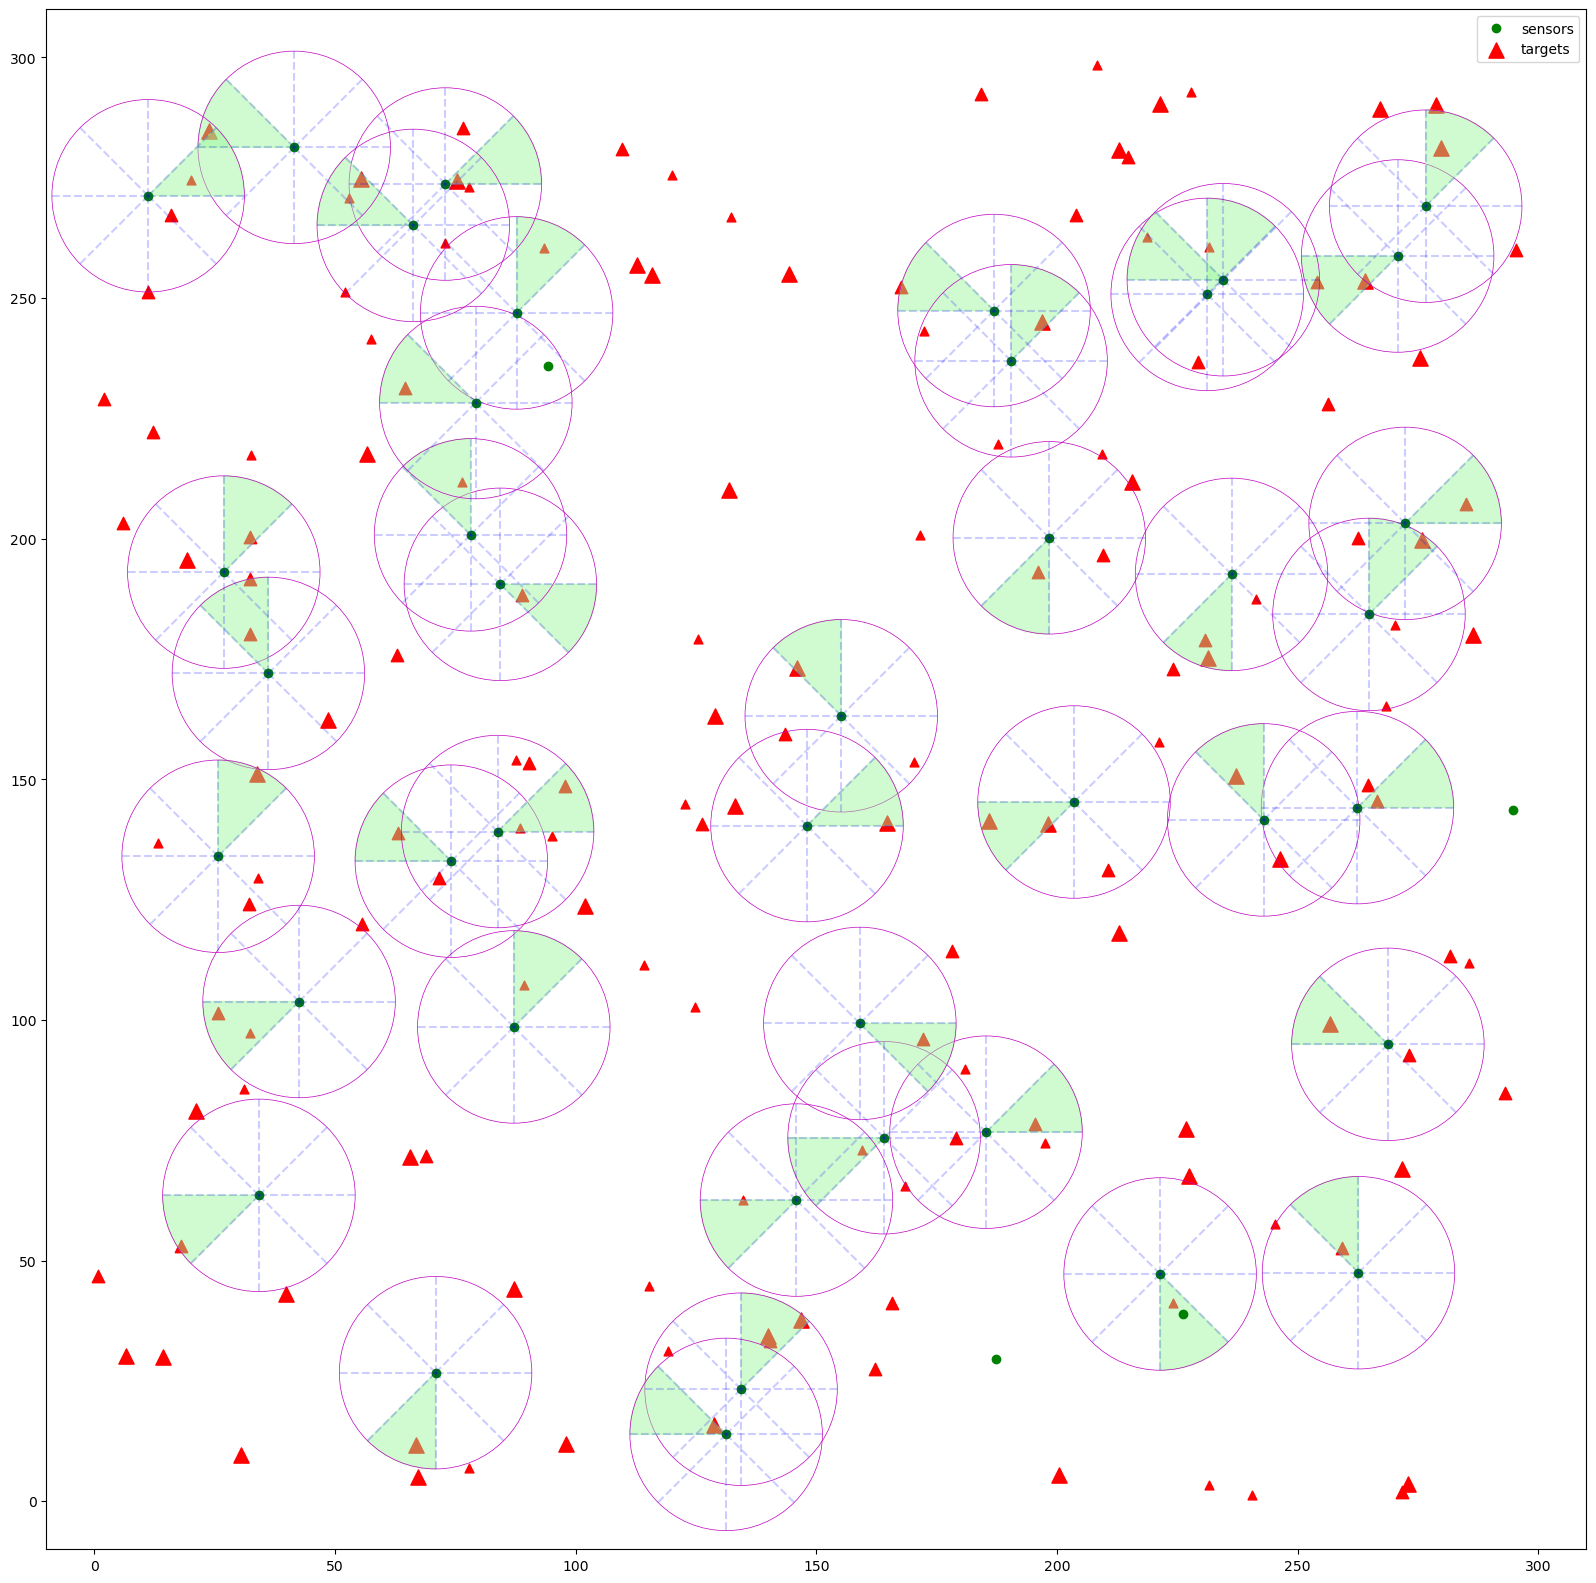

In [34]:
sensors_mask = soga_linear_res['fixed-sensor'][0]['large'][30].sensors_mask
network = datasets['fixed-sensor'][0]['large'][30]
show_network(data=network, sensors_mask=sensors_mask, figsize=(20, 20))

### quadratic mode

In [24]:
soga_quadratic_res = {'fixed-sensor': [], 'fixed-target': []}
soga = SOGA()

In [25]:
for data_type in DATA_TYPES:
    data_type_res = []
    for i in tqdm.tqdm(range(len(datasets[data_type]))):
        dataset_res = {}
        for data_size in datasets[data_type][i]:
            dataset_size_res = []
            for j in range(len(datasets[data_type][i][data_size])):
                dt = datasets[data_type][i][data_size][j]
                soga.adapt(data=dt)
                sensors_mask, _ = soga.solve(mode='quadratic')
                res = SolveResult(sensors_mask=sensors_mask)
                
                dataset_size_res.append(res)
            dataset_res[data_size] = dataset_size_res
        data_type_res.append(dataset_res)
    soga_quadratic_res[data_type] = data_type_res

100%|██████████| 10/10 [04:10<00:00, 25.04s/it]


In [32]:
with open('./saved/soga_quadratic_res.pkl', 'rb') as f:
    soga_quadratic_res = pickle.load(f)

# with open('./saved/soga_quadratic_res.pkl', 'wb') as f:
#     pickle.dump(soga_quadratic_res, f)

### prioritize mode

In [29]:
soga_prioritize_res = {'fixed-sensor': [], 'fixed-target': []}
soga = SOGA()

In [30]:
for data_type in DATA_TYPES:
    data_type_res = []
    for i in tqdm.tqdm(range(len(datasets[data_type]))):
        dataset_res = {}
        for data_size in datasets[data_type][i]:
            dataset_size_res = []
            for j in range(len(datasets[data_type][i][data_size])):
                dt = datasets[data_type][i][data_size][j]
                soga.adapt(data=dt)
                sensors_mask, _ = soga.solve(mode='prioritize')
                res = SolveResult(sensors_mask=sensors_mask)
                
                dataset_size_res.append(res)
            dataset_res[data_size] = dataset_size_res
        data_type_res.append(dataset_res)
    soga_prioritize_res[data_type] = data_type_res

100%|██████████| 10/10 [04:16<00:00, 25.63s/it]


In [38]:
with open('./saved/soga_prioritize_res.pkl', 'wb') as f:
    pickle.dump(soga_prioritize_res, f)

In [ ]:
sensors_mask = soga_prioritize_res['fixed-sensor'][0]['large'][30].sensors_mask
network = datasets['fixed-sensor'][0]['large'][30]
show_network(data=network, sensors_mask=sensors_mask, figsize=(20, 20))

### reduced_variance mode

In [7]:
soga_reduced_variance_res = {'fixed-sensor': [], 'fixed-target': []}
soga = SOGA()

In [8]:
for data_type in DATA_TYPES:
    data_type_res = []
    for i in tqdm.tqdm(range(len(datasets[data_type]))):
        dataset_res = {}
        for data_size in datasets[data_type][i]:
            dataset_size_res = []
            for j in range(len(datasets[data_type][i][data_size])):
                dt = datasets[data_type][i][data_size][j]
                soga.adapt(data=dt)
                sensors_mask, _ = soga.solve(mode='reduced_variance')
                res = SolveResult(sensors_mask=sensors_mask)
                
                dataset_size_res.append(res)
            dataset_res[data_size] = dataset_size_res
        data_type_res.append(dataset_res)
    soga_reduced_variance_res[data_type] = data_type_res

100%|██████████| 10/10 [04:56<00:00, 29.64s/it]


In [9]:
with open('./saved/soga_reduced_variance_res.pkl', 'wb') as f:
    pickle.dump(soga_reduced_variance_res, f)

In [ ]:
sensors_mask = soga_reduced_variance_res['fixed-sensor'][0]['large'][30].sensors_mask
network = datasets['fixed-sensor'][0]['large'][30]
show_network(data=network, sensors_mask=sensors_mask, figsize=(20, 20))

# Metric evaluate

In [2]:
# with open('./saved/lshade_res_fixed_sensor_1.pkl', 'rb') as f:
#     lshade_res_fixed_sensor_1 = pickle.load(f)
# with open('./saved/lshade_res_fixed_target_1.pkl', 'rb') as f:
#     lshade_res_fixed_target_1 = pickle.load(f)
# lshade_res_1 = {'fixed-sensor':lshade_res_fixed_sensor_1,
#                 'fixed-target':lshade_res_fixed_target_1}
# with open('./saved/lshade_res_1.pkl', 'wb') as f:
#     pickle.dump(lshade_res_1, f)

# with open('./saved/lshade_res_fixed_sensor_3.pkl', 'rb') as f:
#     lshade_res_fixed_sensor_3 = pickle.load(f)
# with open('./saved/lshade_res_fixed_target_3.pkl', 'rb') as f:
#     lshade_res_fixed_target_3 = pickle.load(f)
# lshade_res_3 = {'fixed-sensor':lshade_res_fixed_sensor_3,
#                 'fixed-target':lshade_res_fixed_target_3}
# with open('./saved/lshade_res_3.pkl', 'wb') as f:
#     pickle.dump(lshade_res_3, f)

In [9]:
with open('./saved/lshade_res_1.pkl', 'rb') as f:
    lshade_res_1 = pickle.load(f)
with open('./saved/lshade_res_3.pkl', 'rb') as f:
    lshade_res_3 = pickle.load(f)
with open('./saved/lshade_res_6.pkl', 'rb') as f:
    lshade_res_6 = pickle.load(f)

with open('./saved/soga_linear_res.pkl', 'rb') as f:
    soga_linear_res = pickle.load(f)
with open('./saved/soga_prioritize_res.pkl', 'rb') as f:
    soga_prioritize_res = pickle.load(f)
with open('./saved/soga_quadratic_res.pkl', 'rb') as f:
    soga_quadratic_res = pickle.load(f)
with open('./saved/soga_reduced_variance_res.pkl', 'rb') as f:
    soga_reduced_variance_res = pickle.load(f)

In [10]:
di_lshade_1 = {'fixed-sensor':{'small': None, 'large': None, 'huge': None},
               'fixed-target':{'small': None, 'large': None, 'huge': None}}
di_lshade_3 = {'fixed-sensor':{'small': None, 'large': None, 'huge': None},
               'fixed-target':{'small': None, 'large': None, 'huge': None}}
di_lshade_6 = {'fixed-sensor':{'small': None, 'large': None, 'huge': None},
               'fixed-target':{'small': None, 'large': None, 'huge': None}}

di_soga_linear = {'fixed-sensor':{'small': None, 'large': None, 'huge': None},
                  'fixed-target':{'small': None, 'large': None, 'huge': None}}
di_soga_quadratic = {'fixed-sensor':{'small': None, 'large': None, 'huge': None},
                     'fixed-target':{'small': None, 'large': None, 'huge': None}}
di_soga_prioritize = {'fixed-sensor':{'small': None, 'large': None, 'huge': None},
                      'fixed-target':{'small': None, 'large': None, 'huge': None}}
di_soga_reduved_variance = {'fixed-sensor':{'small': None, 'large': None, 'huge': None},
                            'fixed-target':{'small': None, 'large': None, 'huge': None}}

## DI

In [11]:
# lshade_res_1
for data_type in tqdm.tqdm(DATA_TYPES):
    for data_size in DATA_SIZES:
        di_lshade_1[data_type][data_size] = generate_metric_evaluation(datasets=datasets,
                                                                       res_set=lshade_res_1,
                                                                       data_type=data_type,
                                                                       data_size=data_size,
                                                                       metric='distance_index')

100%|██████████| 2/2 [11:16<00:00, 338.01s/it]


In [12]:
# lshade_res_3
for data_type in tqdm.tqdm(DATA_TYPES):
    for data_size in DATA_SIZES:
        di_lshade_3[data_type][data_size] = generate_metric_evaluation(datasets=datasets,
                                                                       res_set=lshade_res_3,
                                                                       data_type=data_type,
                                                                       data_size=data_size,
                                                                       metric='distance_index')

100%|██████████| 2/2 [10:15<00:00, 307.51s/it]


In [13]:
# lshade_res_6
for data_type in tqdm.tqdm(DATA_TYPES):
    for data_size in DATA_SIZES:
        di_lshade_6[data_type][data_size] = generate_metric_evaluation(datasets=datasets,
                                                                       res_set=lshade_res_6,
                                                                       data_type=data_type,
                                                                       data_size=data_size,
                                                                       metric='distance_index')

100%|██████████| 2/2 [11:55<00:00, 357.84s/it]


In [14]:
lshdae_metric_res = {'distance_index': {
    'lshade_res_1': di_lshade_1,
    'lshade_res_3': di_lshade_3,
    'lshade_res_6': di_lshade_6,
}}

In [15]:
with open('./saved/lshade_metric_res.pkl', 'wb') as f:
    pickle.dump(lshdae_metric_res, f)

# Plot

In [4]:
with open('./saved/lshade_res.pkl', 'rb') as f:
    lshade_res = pickle.load(f)

In [13]:
data_type = 'fixed-sensor'
data_size = 'huge'

In [10]:
def generate_metric_evaluation(datasets, res_set, data_type, data_size, metric, genome_type='sensors_mask', avg_for_multiple_datasets=True):
    metric_func_dict = {
        'distance_index': distance_index,
        'q_balancing_index': q_balancing_index,
        'achieved_coverage': achieved_coverage,
        'coverage_quality': coverage_quality,
        'variance': variance,
        'activated_sensor': activated_sensor
    }

    metric_func = metric_func_dict[metric]
    
    metric_res = []
    for i, dataset in enumerate(res_set[data_type]):
        metric_res.append([metric_func(data=datasets[data_type][i][data_size][j], sensors_mask=res_set[data_type][i][data_size][j].sensors_mask)
                           for j in range(len(res_set[data_type][i][data_size]))])
    metric_res = np.array(metric_res)

    if avg_for_multiple_datasets:
        return metric_res.mean(axis=0)
    else:
        return metric_res

In [42]:
res = generate_metric_evaluation(datasets=datasets, res_set=lshade_res, data_type=data_type, data_size='large', metric='distance_index')

In [15]:
res

array([0.21411801, 0.23110434, 0.20499777, 0.1927481 , 0.1840393 ,
       0.17343653, 0.16877932, 0.15607412, 0.143411  , 0.1296806 ,
       0.12852374, 0.12011241, 0.10929427, 0.1296784 , 0.1182466 ,
       0.10265747, 0.1077688 , 0.10920606, 0.10888898, 0.10587706,
       0.09651305, 0.11313172, 0.0930143 , 0.09482342, 0.1039306 ,
       0.10376658, 0.10033071, 0.09375111, 0.10103483, 0.09959949])

In [45]:
x_axis = [datasets[data_type][0]['large'][i].m for i in range(len(datasets[data_type][0]['large']))]

In [23]:
x_axis

[10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300]

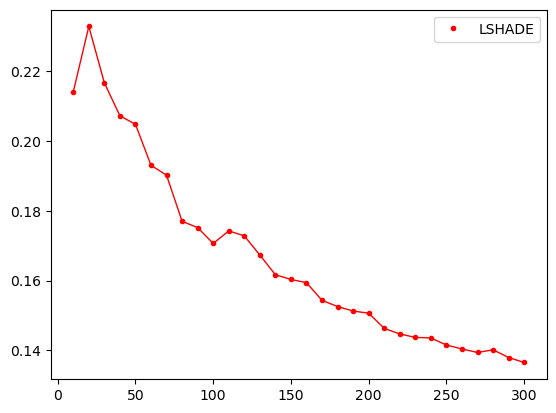

In [34]:
plt.plot(x_axis, res, 'r-', linewidth=1.0)
plt.plot(x_axis, res, 'ro', markersize=3.0, label='LSHADE')
plt.legend()

plt.show()

In [43]:
with open('./saved/soga_linear_res.pkl', 'rb') as f:
    soga_linear_res = pickle.load(f)
res2 = generate_metric_evaluation(datasets=datasets, res_set=soga_linear_res, data_type=data_type, data_size='large', metric='distance_index')

In [47]:
with open('./saved/soga_quadratic_res.pkl', 'rb') as f:
    soga_quadratic_res = pickle.load(f)
res3 = generate_metric_evaluation(datasets=datasets, res_set=soga_quadratic_res, data_type=data_type, data_size='large', metric='distance_index')

In [156]:
from matplotlib.pyplot import cm

def plot_metric_evaluation(x_axis, y_axis, x_label, y_label, labels, title, figsize=(10, 8)):
    y_axis = list(y_axis)
    labels = list(labels)
    colors = cm.get_cmap('Accent').colors

    f, ax = plt.subplots(figsize=figsize)
    for y, label,color in zip(y_axis, labels, colors):
        ax.plot(x_axis, y, '-', linewidth=1.0, c=color, label=label)
        ax.plot(x_axis, y, 'o', markersize=3.0, c=color)
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()

    return ax


C:\Users\Admin\AppData\Local\Temp\ipykernel_2136\2014908614.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Accent').colors


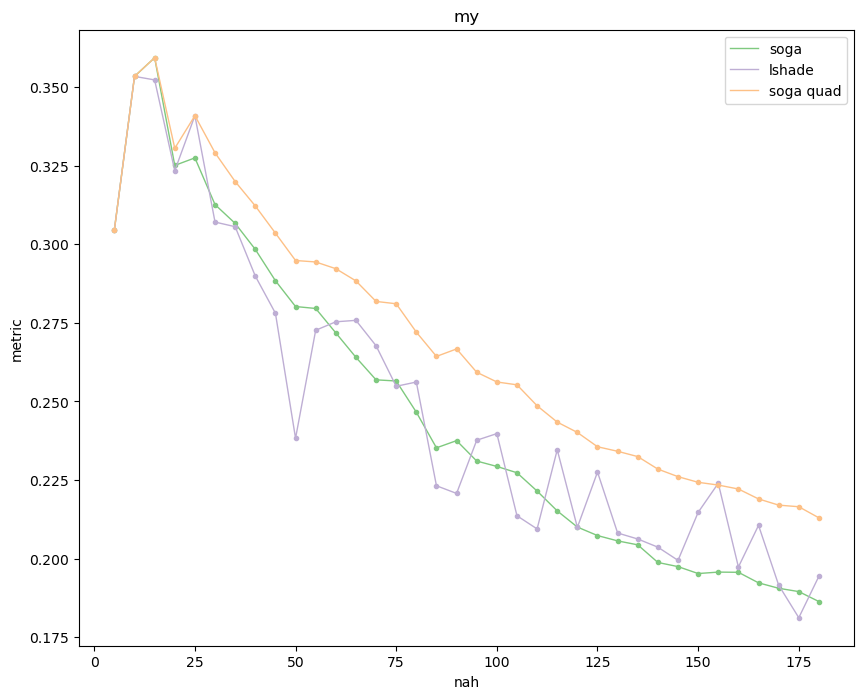

In [157]:
ax = plot_metric_evaluation(x_axis=x_axis,y_axis=[res2, res, res3], x_label='nah', y_label='metric', labels=['soga', 'lshade', 'soga quad'], title='my')
plt.show()

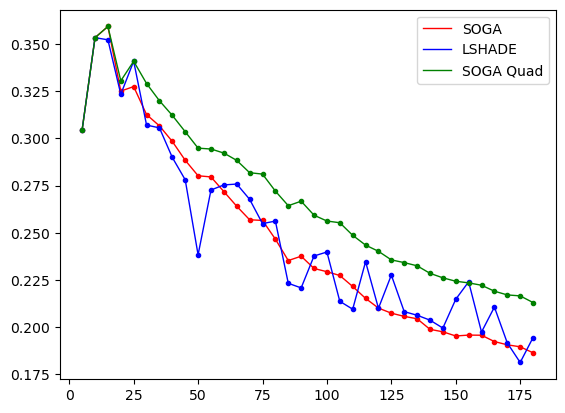

In [139]:
plt.plot(x_axis, res2, '-', c='r', linewidth=1.0, label='SOGA')
plt.plot(x_axis, res2, 'o', c='r', markersize=3.0)
plt.plot(x_axis, res, 'b-', linewidth=1.0, label='LSHADE')
plt.plot(x_axis, res, 'bo', markersize=3.0)
plt.plot(x_axis, res3, 'g-', linewidth=1.0, label='SOGA Quad')
plt.plot(x_axis, res3, 'go', markersize=3.0)
plt.legend()

plt.show()

In [20]:
with open('./saved/soga_metric_res.pkl', 'rb') as f:
    soga_metric_res = pickle.load(f)

{'distance_index': {'soga_linear_res': {'fixed-sensor': {'small': array([0.47879943, 0.43495486, 0.38023323, 0.36008857, 0.34764897,
           0.34366182, 0.33580804, 0.32178922, 0.32467894, 0.31268402,
           0.30983707, 0.30004493, 0.28913639, 0.27836463, 0.27186993,
           0.2617149 , 0.25534595, 0.24839591, 0.23976691, 0.23175938,
           0.22724682, 0.22371913, 0.2227964 , 0.22210275]),
    'large': array([0.30457098, 0.35335032, 0.35928173, 0.32504248, 0.32743268,
           0.31258164, 0.30660995, 0.29834135, 0.28838219, 0.28017032,
           0.27955477, 0.27179569, 0.26401789, 0.2568599 , 0.25649796,
           0.24657459, 0.23524221, 0.23753487, 0.23104107, 0.2293299 ,
           0.22731848, 0.22149706, 0.21519082, 0.21004904, 0.20734913,
           0.20565723, 0.20439653, 0.19879347, 0.19747581, 0.19527129,
           0.19573137, 0.19566595, 0.19231222, 0.19058656, 0.1895316 ,
           0.18636266]),
    'huge': array([0.21411801, 0.23287382, 0.21670489, 0.20726

In [54]:
data_type = 'fixed-target'
data_size = 'huge'

In [59]:
soga_linear_res = soga_metric_res['distance_index']['soga_linear_res'][data_type][data_size]
soga_quadratic_res = soga_metric_res['distance_index']['soga_quadratic_res'][data_type][data_size]
soga_prioritize_res = soga_metric_res['distance_index']['soga_prioritize_res'][data_type][data_size]
soga_reduced_variance_res = soga_metric_res['distance_index']['soga_reduced_variance_res'][data_type][data_size]

lshade_1_res = lshdae_metric_res['distance_index']['lshade_res_1'][data_type][data_size]
lshade_3_res = lshdae_metric_res['distance_index']['lshade_res_3'][data_type][data_size]
lshade_6_res = lshdae_metric_res['distance_index']['lshade_res_6'][data_type][data_size]

di_metric_res = [soga_linear_res, soga_quadratic_res, soga_prioritize_res, soga_reduced_variance_res, lshade_1_res, lshade_3_res, lshade_6_res]

In [62]:
x_axis

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [60]:
x_axis = [datasets[data_type][0][data_size][i].n for i in range(len(datasets[data_type][0][data_size]))]

In [65]:
datasets[data_type][0][data_size][3].n

1

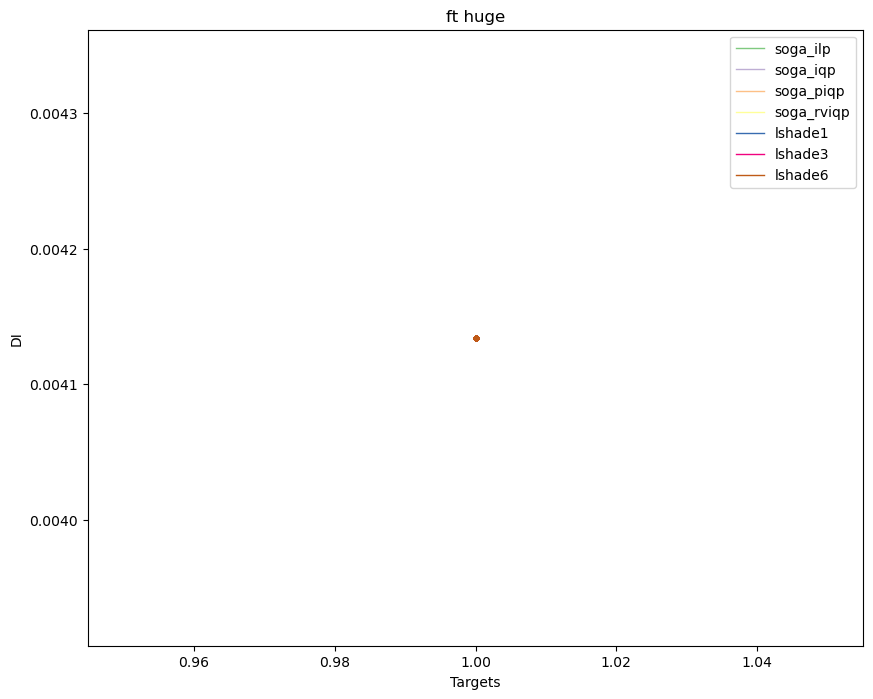

In [61]:
ax = plot_metric_evaluation(x_axis=x_axis,y_axis=di_metric_res, x_label='Targets', y_label='DI', labels=['soga_ilp', 'soga_iqp', 'soga_piqp', 'soga_rviqp', 'lshade1', 'lshade3', 'lshade6'], title='ft huge')
plt.show()